In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import tensorflow as tf
import tensorflow_io as tfio
import os
from tqdm import tqdm
import cv2
from PIL import Image
from joblib import Parallel, delayed
import gc

In [2]:
with (open('/kaggle/input/output/training_img_data.pkl', "rb")) as openfile:
     train_data = pickle.load(openfile)

In [3]:
zero_array = np.zeros((128,128))
counter=0
for i,j in enumerate(tqdm(train_data['img_data'])):
    if np.array_equiv(j,zero_array) == True:
        counter+=1
        train_data = train_data.drop(i)
      
print(counter)
        

100%|██████████| 54706/54706 [00:58<00:00, 933.41it/s]

4969


In [4]:
train_data_pos = train_data[train_data['cancer'] == 1]
train_data_neg = train_data[train_data['cancer'] == 0]

train_data_pos = train_data_pos.sample(frac = 1)
test_data = train_data_pos[int(2*len(train_data_pos)/3):]
train_data_pos = train_data_pos[:int(2*len(train_data_pos)/3)]
train_data_neg = train_data_neg.sample(frac = 1)

train_data_neg = train_data_neg.sample(frac= 0.04)

frames = [train_data_pos]
frames.append(train_data_neg)
train_data_shuff = pd.concat(frames)
train_data_shuff = train_data_shuff.sample(frac=1)

In [5]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(train_data_shuff, test_size=0.3, random_state=42, shuffle=True)

In [6]:

train_target = np.array(train['cancer'])

In [7]:
train_features=[]
for i in train['img_data']:
    train_features.append([i])
train_features=np.array(train_features)


In [8]:
train_features = train_features.reshape(len(train_features),128,128,1)



In [9]:
from tensorflow.keras.preprocessing.image import random_rotation
def ModifiedWay(rotateImage, angle):
    
    # Taking image height and width
    imgHeight, imgWidth = rotateImage.shape[0], rotateImage.shape[1]
  
    # Computing the centre x,y coordinates
    # of an image
    centreY, centreX = imgHeight//2, imgWidth//2
  
    # Computing 2D rotation Matrix to rotate an image
    rotationMatrix = cv2.getRotationMatrix2D((centreY, centreX), angle, 1.0)
  
    # Now will take out sin and cos values from rotationMatrix
    # Also used numpy absolute function to make positive value
    cosofRotationMatrix = np.abs(rotationMatrix[0][0])
    sinofRotationMatrix = np.abs(rotationMatrix[0][1])
  
    # Now will compute new height & width of
    # an image so that we can use it in
    # warpAffine function to prevent cropping of image sides
    newImageHeight = int((imgHeight * sinofRotationMatrix) +
                         (imgWidth * cosofRotationMatrix))
    newImageWidth = int((imgHeight * cosofRotationMatrix) +
                        (imgWidth * sinofRotationMatrix))
  
    # After computing the new height & width of an image
    # we also need to update the values of rotation matrix
    rotationMatrix[0][2] += (newImageWidth/2) - centreX
    rotationMatrix[1][2] += (newImageHeight/2) - centreY
  
    # Now, we will perform actual image rotation
    rotatingimage = cv2.warpAffine(
        rotateImage, rotationMatrix, (newImageWidth, newImageHeight))
  
    return rotatingimage

1


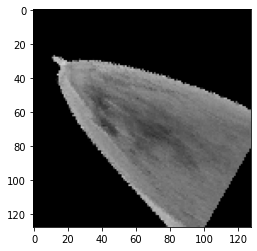

In [10]:
from PIL import Image as im
ids=713
img1=train_features[ids].reshape(128,128)
img1 = im.fromarray(img1)
img1 = np.asarray(img1.rotate(150))
plt.imshow(img1,cmap='gray',vmin=0,vmax=1)
print(train_target[ids])